## Lab 3 - Galactic rotation

In [85]:
import matplotlib.pyplot as plt 
import numpy as np
from sympy import Symbol
from sympy.printing.latex import latex

In [86]:
Rsun = 8.5 # kpc
vsun = 220000 # m/s

### longitude l [°] and velocity v [m/s]

In [87]:
l = np.array([89.99255, 87.997854, 86.01696, 84.00906, 81.99759, 80.07000, 77.95953, 75.99178, 73.99966, 71.99348, 70.00052, 68.00550, 65.99581, 63.98956, 61.99490, 59.99985, 59.00081, 58.00152, 57.00221, 55.97966, 55.00358, 54.00439, 53.00506, 52.00572, 51.00638, 49.99318, 48.98937, 47.99001, 46.99065, 45.99129, 44.99192, 43.99976, 42.99103, 41.99575, 41.01899, 39.99680, 39.01774, 37.99479, 36.99507, 35.99536, 34.99564, 33.99591, 32.99619, 31.99646, 30.99673, 29.99700, 28.99726, 27.99752, 26.99778, 25.99804, 24.99830, 23.99855, 22.99881, 21.99907, 20.99932, 19.99957, 18.99027, 17.99058, 16.99088, 15.9911842, 15.01470, 13.99179, 12.99209, 11.96914])
v = np.array([4653.064, 4187.927, 5814.043, 7823.431, 7421.553, 8627.186, 8253.472, 7047.84, 6825.784, 8620.291, 8171.664, 8508.134, 19050.86, 21630.46, 27817.9, 38697.09, 33907.74, 31582.06, 36233.42, 38791.67, 39954.51, 56420.5, 62002.13, 62234.7, 52001.7, 59536.99, 64095.24, 62467.26, 62932.4, 59676.45, 58048.47, 63008.85, 70949.54, 65969.78, 72045.06, 70026.24, 81397.54, 80002.13, 85816.33, 80932.4, 85816.33, 95351.62, 95584.19, 100468.1, 109538.3, 106514.9, 98840.14, 101631, 95584.19, 107677.7, 98142.44, 101165.8, 107445.2, 109073.1, 121166.7, 119306.1, 123072.3, 128421.3, 129816.8, 139584.6, 139352, 150515.3, 145863.9, 149352.5])

In [88]:
Rmin = np.sin(l*np.pi/180) * Rsun # in kpc
v_Rmin = (v + vsun * np.sin(l*np.pi/180))/1000 # in km/s

In [ ]:
# approximated reading errors for measurement data
s_l = 0.1
s_v = 100

# error calculation for radius and velocity
s_Rmin = np.abs(s_l * np.cos(l*np.pi/180) * Rsun * np.pi/180) #kpc
s_vRmin = np.sqrt(s_v**2 + (s_l*vsun * np.cos(l*np.pi/180)* np.pi/180)**2 )/1000 #km/s

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

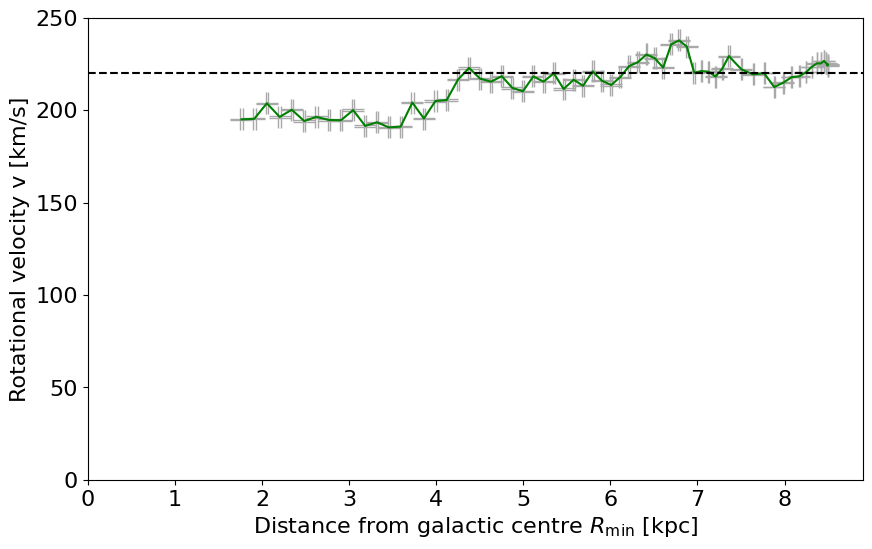

In [90]:
plt.figure(figsize=(10, 6))
plt.errorbar(Rmin,v_Rmin, xerr= s_Rmin, yerr=s_vRmin, color='darkgrey', linestyle='none', capsize=8)
plt.plot(Rmin,v_Rmin, color='green')
plt.hlines(vsun/1000,0,8.9, color='black', ls='--')
plt.ylim(0, 250)
plt.xlim(0, 8.9)
plt.xlabel(r'Distance from galactic centre $R_{\min}$ [kpc]', fontsize=16)
plt.ylabel('Rotational velocity v [km/s]', fontsize=16)

plt.savefig('v-r.png', dpi=300, bbox_inches='tight')
plt.yticks(fontsize=16) 
plt.xticks(fontsize=16)  

In [ ]:
# transform to correct units
v_Rmin = v_Rmin*1000 # m/s
Rmin = Rmin*1000*3.0857*10**(16) # in m
s_Rmin *= 3.0857*10**(19) # in m
s_vRmin *= 1000 # in m/s
# gravitational constant
G = 6.674*10**(-11) # in SI

mass at solar radius: 1e+11 [solar mass]
mass at solar radius: 99747921865.72655 [solar mass]
error:  9e+07
error:  88801760.89149615


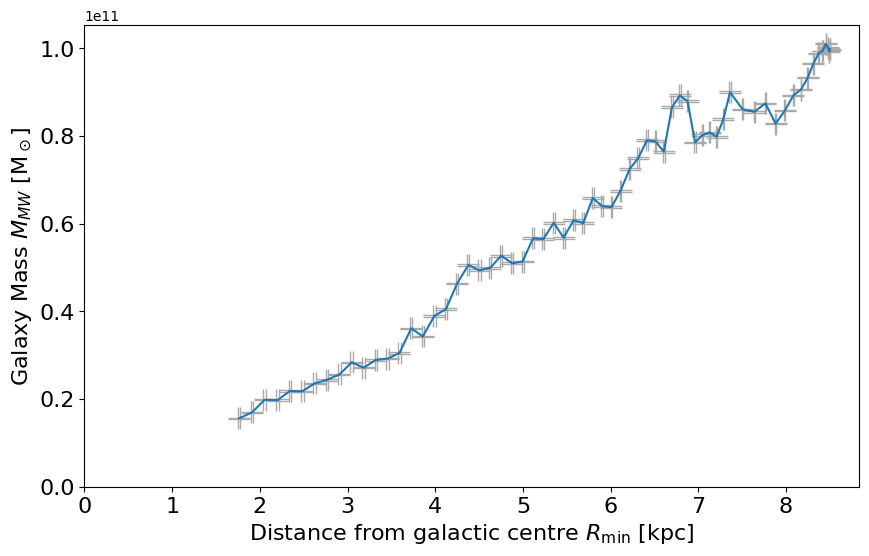

In [ ]:
M_approx = Rmin*v_Rmin**2/G
# calculation of the mass error via gaussian error propagation
s_M = np.sqrt((s_Rmin*v_Rmin**2/G)**2 + (s_vRmin*Rmin*v_Rmin*2/G)**2)

plt.figure(figsize=(10, 6))
plt.errorbar(Rmin/(1000*3.0857*10**(16)), M_approx/(1.988416*(10**30)), xerr= s_Rmin/(1000*3.0857*10**(16)), yerr=s_M/(1.988416*(10**30)), color='darkgrey', linestyle='none', capsize=8)
plt.plot(Rmin/(1000*3.0857*10**(16)), M_approx/(1.988416*(10**30)))
plt.xlabel(r'Distance from galactic centre $R_{\min}$ [kpc]', fontsize=16)
plt.ylabel(r'Galaxy Mass $M_{MW}$ [M$_\odot$]', fontsize=16)
plt.xlim(0,)
plt.ylim(0,)
plt.savefig('mass_profile.png', dpi=300, bbox_inches='tight')
plt.yticks(fontsize=16) 
plt.xticks(fontsize=16) 

print(f'mass at solar radius: {(M_approx[0])/(1.988416*(10**30)):.0e}' , '[solar mass]')
print(f'mass at solar radius: {(M_approx[0])/(1.988416*(10**30))}' , '[solar mass]')
print(f'error:  {(s_M[0]/(1.988416*(10**30))):.0e}')
print(f'error:  {(s_M[0]/(1.988416*(10**30)))}')

#### Density profile from Mass profile

8.499999928145128 1.7627709867355503


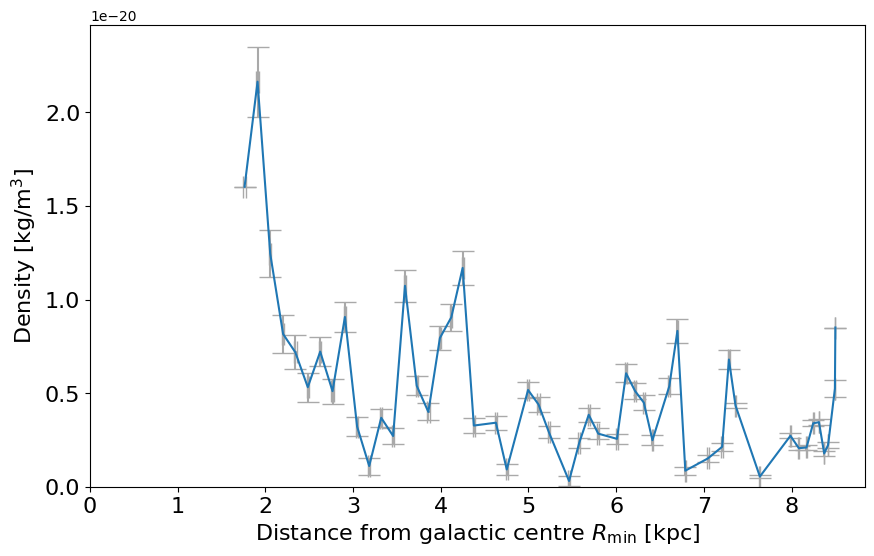

In [ ]:
rho = 1/(4*np.pi*Rmin**2) * np.gradient(M_approx, Rmin)
vals = rho > 0 # nur positive Dichten, sonst unphysikalisch

# error calculation for density profile:
s_rho = np.zeros((rho.shape[0]))
for i in range(1, rho.shape[0]-1):
    s_rho[i] = np.sqrt(
        (1/(4*np.pi*Rmin[i]**2) * 1/(Rmin[i+1] - Rmin[i-1]) * s_M[i+1])**2 
        + (1/(4*np.pi*Rmin[i]**2) * 1/(Rmin[i+1] - Rmin[i-1]) * s_M[i-1])**2 
        + (1/(2*np.pi*Rmin[i]**3) * (M_approx[i+1] - M_approx[i-1])/(Rmin[i+1] - Rmin[i-1]) * s_Rmin[i])**2 
        + (1/(4*np.pi*Rmin[i]**2) * (M_approx[i+1] - M_approx[i-1])/(Rmin[i+1] - Rmin[i-1])**2 * s_Rmin[i+1])**2 
        + (1/(4*np.pi*Rmin[i]**2) * (M_approx[i+1] - M_approx[i-1])/(Rmin[i+1] - Rmin[i-1])**2 * s_Rmin[i-1])**2
    )

plt.figure(figsize=(10, 6))
plt.errorbar(Rmin[vals]/(1000*3.0857*10**(16)), rho[vals], xerr= s_Rmin[vals]/(1000*3.0857*10**(16)), yerr=s_rho[vals], color='darkgrey', linestyle='none', capsize=8)
plt.plot(Rmin[vals]/(1000*3.0857*10**(16)), rho[vals])
plt.xlabel(r'Distance from galactic centre $R_{\min}$ [kpc]', fontsize=16)
plt.ylabel(r'Density [kg/m$^3$]', fontsize=16)
plt.xlim(0,)
plt.ylim(0,)
plt.savefig('density_profile.png', dpi=300, bbox_inches='tight')
plt.yticks(fontsize=16) 
plt.xticks(fontsize=16) 
print(Rmin[0]/(1000*3.0857*10**(16)) , Rmin[-1]/(1000*3.0857*10**(16)))

### Sun's orbital period around galactic centre

In [95]:
T = 2*np.pi*Rsun*3.086*10**19/(vsun) *1/(3600*24*365.25*10**6) # in million years
print(f'Sun\'s orbital period around galactic centre: {np.round(T, 2)} million years')

Sun's orbital period around galactic centre: 237.39 million years
